# Titanic Survival Prediction

## Importing Libraries and Datasets

In [156]:
# Import Packages for Feature Engineering and Data Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Import Packages for Machine Learning Modelling
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [157]:
# Import Datasets
train = pd.read_csv("C:/Users/New/GitProjects/MyProjects/Predicting-Titanic-Survivors/Datasets/train.csv")
test = pd.read_csv("C:/Users/New/GitProjects/MyProjects/Predicting-Titanic-Survivors/Datasets/test.csv")

In [158]:
# Merge Train and Test Datasets Using the concat Method
dataset = pd.concat([train,test])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


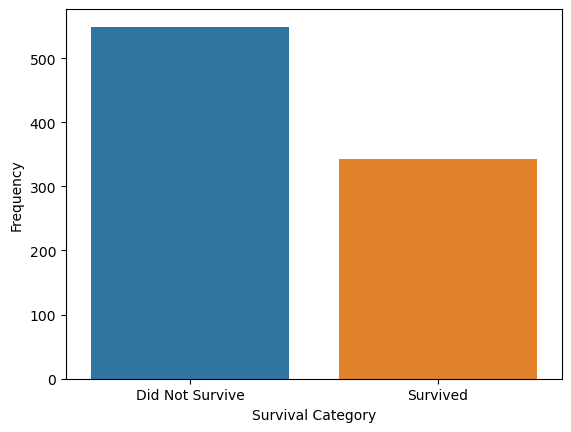

In [159]:
# Target Distribution In Train Dataset
sns.countplot(data=train, x='Survived')
plt.ylabel('Frequency')
plt.xlabel('Survival Category')
plt.xticks([0.0, 1.0], ['Did Not Survive', 'Survived']);

## Feature Engineering and Data Cleaning

In [160]:
# Feature Cleaning and Engineering
# Replace Column Elements for Readability
emb = {"Q" : "Queenstown" , "S" : "Southampton" , "C" : "Cherbourg" }
dataset['Embarked'].replace(emb)

cla = {1:"First Class", 2: "Second Class", 3 :"Third Class"}
dataset['Pclass'].replace(cla)

# Transform Ticket into Lettered Column by Ticket Type (Numeric or Alphanumeric Ticket)
def has_letters(string):
    return any(char.isalpha() for char in string)
dataset['Ticket_Type'] = dataset['Ticket'].apply(has_letters).astype('object')

# Separate Dataset Features into Categorical and Numeric Variable (Useful For Visualizations)
num_cols = list(dataset.select_dtypes(exclude=['object']).columns)
cat_cols = list(dataset.select_dtypes(include=['object']).columns)

# Encode the Categorical Features
le = LabelEncoder()
for col in cat_cols:
    le.fit(dataset[col])
    dataset[col] = le.transform(dataset[col])
  
# Dropped Unneeded Columns After Feature Engineering
drop_cols = ["Name", "Cabin", "Ticket"]
dataset = dataset.drop(columns = drop_cols)

In [161]:
# Create Target, Features, and Train-Test Split
# Split Dataset into Features and Target
X = dataset.drop(['Survived', 'PassengerId' ], axis=1)
y = dataset['Survived']

# Split into Test and Train Data by Index 
cutoff = len(train)
X_train = X.iloc[:cutoff]
y_train = y.iloc[:cutoff]
X_test = X.iloc[cutoff:]
y_test = y.iloc[cutoff:]

## Prediction Using the Logistic Regression Model

In [162]:
# Create Pipeline With KNNImputer and Classification Model  
model = LogisticRegression(random_state= 42, max_iter=1000)
scaler = RobustScaler()
imputer = KNNImputer(n_neighbors=5)
pipeline = Pipeline(steps=[('i', imputer), ('s', scaler) , ('m', model)])

# Fit the Pipeline on Training Data
pipeline.fit(X_train, y_train)
accuracy = pipeline.score(X_train, y_train)
print(f" Training Accuracy: {accuracy}")

 Training Accuracy: 0.8069584736251403


In [163]:
# Make Survival Prediction in the Test Dataset and Save Results to Excel File
predictions = pipeline.predict(X_test)
model_output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
model_output.to_csv('C:/Users/New/Downloads/LRPredictions.csv', index=False)
print("Your submission was successfully saved to a .csv file!")

# Check how many survivors/non-survivors the Model Predicted
unique, counts = np.unique(predictions, return_counts=True)
dict(zip(unique, counts))

# Save Model to a .pkl File 
pickle.dump(pipeline, open('C:/Users/New/GitProjects/MyProjects/Predicting-Titanic-Survivors/Models/LRModel.pkl', 'wb'))

Your submission was successfully saved to a .csv file!


## Prediction Using the Logistic Regression Cross Validation Model

In [164]:
# Create Pipeline With KNNImputer and Logistic Regression CV Model  
model = LogisticRegressionCV(cv=5, max_iter = 1000, random_state=42, n_jobs=-1)
scaler = RobustScaler()
imputer = KNNImputer(n_neighbors=5)
pipeline = Pipeline(steps=[('i', imputer), ('s', scaler) , ('m', model)])

# Fit the Pipeline on Training Data
pipeline.fit(X_train, y_train)
accuracy = pipeline.score(X_train, y_train)
print(f" Training Accuracy: {accuracy}")

 Training Accuracy: 0.8080808080808081


In [165]:
# Make Survival Prediction in the Test Dataset and Save Results to Excel File
predictions = pipeline.predict(X_test)
model_output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
model_output.to_csv('C:/Users/New/Downloads/LRCVPredictions.csv', index=False)
print("Your submission was successfully saved to a .csv file!")

# Check how many survivors/non-survivors the Model Predicted
unique, counts = np.unique(predictions, return_counts=True)
dict(zip(unique, counts))

# Save Model to a .pkl File 
pickle.dump(pipeline, open('C:/Users/New/GitProjects/MyProjects/Predicting-Titanic-Survivors/Models/LRCVModel.pkl', 'wb'))

Your submission was successfully saved to a .csv file!


## Prediction Using the Decision Tree Model